In [9]:
# importing the library to be used 
import numpy as np
import matplotlib.pyplot as plt


In [10]:
# Sample observational data (in degrees Celsius)
observations = np.array([15.2, 16.1, 14.5, 15.8, 25.0])

# Sample model predictions (in degrees Celsius)
model_output = np.array([14.8, 15.5, 14.0, 16.0, 25.3])

In [11]:

# Calculating model covariance
model_covar = np.cov(model_output)

# Calculating observation covariance
obser_covar = np.cov(observations)

print("model_covariance",model_covar)
print("Observations_covariance",obser_covar)


model_covariance 21.477000000000004
Observations_covariance 18.807


In [13]:
#xa = xb + K (y − H xb) from Stephenson et al (2005).Forecast assimilation: a unified framework for the combination of multi-model weather and climate predictions. Tellus A, 57(3), 253-264.
#where xb is the model_output, k is the kalman gain, H is the H = the observation operator, which maps the model state to the observation space and y is the observational data
# According to optimal interpolation analysis

# Finding interpolator operator by Mapping the model_output and the observation data
H= (observations @ model_output.T) / (model_output @ model_output.T)

# Calculating Kalman gain or weight
K = model_covar * H.T * (H * model_covar * H.T + observations)**-1




print("Kalman weight or gain",K)
print ("Interpolation operator", H)

Kalman weight or gain [0.58482087 0.57093134 0.59610007 0.57548729 0.46234434]
Interpolation operator 1.0073676339774909


In [14]:
# Calculating the  analysis field from xa = xb + K (y − H xb)
Analysis = model_output + K * (observations - model_output)
Analysis

array([15.03392835, 15.8425588 , 14.29805004, 15.88490254, 25.1612967 ])

In [15]:
# Calculate RMSE
rmse_model = np.sqrt(np.mean((model_output - observations)**2))
rmse_state = np.sqrt(np.mean((Analysis - observations)**2))

print("RMSE of model output:", rmse_model)
print("RMSE of analysis field:", rmse_state)


RMSE of model output: 0.4242640687119287
RMSE of analysis field: 0.18322915637406761


In [16]:
#calculating the bias
bias_obs = np.mean(observations - Analysis)
bias_model = np.mean(model_output - Analysis)

print("Bias (observations):", bias_obs)
print("Bias (model):", bias_model)

Bias (observations): 0.07585271481249337
Bias (model): -0.12414728518750665


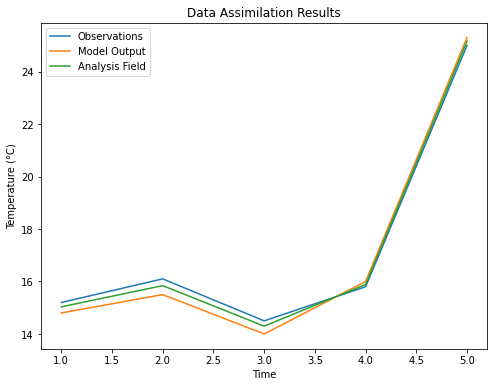

In [18]:
# Plot the analysis field

plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), observations, label='Observations')
plt.plot(range(1, 6), model_output, label='Model Output')
plt.plot(range(1, 6), Analysis, label='Analysis Field')

plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Data Assimilation Results')
plt.legend()
plt.show()